In [1]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

['pT_xjj0p9_newweight.png', 'PT_xbb0p95_reweighted.png', 'output_xbb0p7.png', 'outparquet', 'output_xbb0p95.png', '.DS_Store', '0-1.parquet', 'ROC_curves.ipynb', 'LICENSE', 'requirements.txt', 'mSDstacks_xbb_tw_xcs_rocs_Dec92024.pdf', 'ZJets.ipynb', 'mSD_xjj0p9_newweight.png', 'output_xjj0p7.png', 'Discriminators.ipynb', 'pyproject.toml', 'mSD_xbb0p9_reweighted.png', 'mSD_xbb0p95_reweighted.png', '.sites_map.json', 'output_xbb0p95_nokfactor.png', 'PT_xjj0p9_reweighted.png', 'mSD_xbb0p7_reweighted.png', 'README.md', 'output_xbb0p7_nokfactor.png', 'output_xbb0p95_kfactor.png', 'output_xjj0p7_nokfactor.png', '.gitignore', 'output_xjj0p95.png', 'output_xjj0p9.png', 'print_parquet.py', 'outfiles', 'mSD_xjj0p9_reweighted.png', 'PT_xbb0p7_reweighted.png', '.git', 'data', 'output_xjj0p95_nokfactor.png', 'PT_xbb0p9_reweighted.png', 'output_xbb0p9.png', 'HiggsDiscriminators.ipynb', 'mSDplot.ipynb', 'output_xbb0p9_nokfactor.png', 'src']


In [2]:
pt_axis = hist.axis.Regular(50, 200, 1000, name="pt", label="Jet $p_T$ [GeV]")
trig_axis = hist.axis.Regular(100, 0, 1, name="trigger", label="Trigger")
msd_axis = hist.axis.Regular(32, 40, 200, name="msd", label="mSD [GeV]")                # Soft Drop Mass
xbb_axis = hist.axis.Regular(80, 0, 1, name="xjj", label="Xbb")                         # Discriminator

sample_axis = hist.axis.StrCategory([], name="name", growth=True)                       #samples
proc_axis = hist.axis.StrCategory([], name="process", growth=True)                      #processes: Zto2Q, QCD, TT, Diboson
order_axis = hist.axis.StrCategory([], name="order", growth=True)                       #order: NLO, LO
mreg_axis = hist.axis.Regular(20, 40, 200, name="mreg", label="M_reg [GeV]")                      #Mreg
mleg_axis = hist.axis.Regular(20, 40, 200, name="mleg", label="M_leg [GeV]")                      #Mleg

tz_axis = hist.axis.Regular(80, 0, 1, name="TZ", label="T_Z")                      #T_Z
tw_axis = hist.axis.Regular(80, 0, 1, name="TW", label="T_W")                      #T_W
tv_axis = hist.axis.Regular(80, 0, 1, name="TV", label="T_V")                      #T_V
tcs_axis = hist.axis.Regular(80, 0, 1, name="Tcs", label="Tcs")                      #T_CS


In [3]:
MAIN_DIR = "/Users/gbibim/Here/genZ/data"
#dir_name = "children" #"new"  # data for older samples new for the files with lhe variables
dir_name = "PNetchildren" 
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
year = "2023"  

# Define the samples and the directories where they are stored
samples = {
    "Zto2Q": [
        "Zto2Q-2Jets_PTQQ-100to200_1J",
        "Zto2Q-2Jets_PTQQ-100to200_2J",
        "Zto2Q-2Jets_PTQQ-200to400_1J",
        "Zto2Q-2Jets_PTQQ-200to400_2J",
        "Zto2Q-2Jets_PTQQ-400to600_1J",
        "Zto2Q-2Jets_PTQQ-400to600_2J",
        "Zto2Q-2Jets_PTQQ-600_1J",
        "Zto2Q-2Jets_PTQQ-600_2J",
        ],
    
    
    "Wto2Q":[
        "Wto2Q-2Jets_PTQQ-100to200_1J",
        "Wto2Q-2Jets_PTQQ-100to200_2J",
        "Wto2Q-2Jets_PTQQ-200to400_1J",
        "Wto2Q-2Jets_PTQQ-200to400_2J",
        "Wto2Q-2Jets_PTQQ-400to600_1J",
        "Wto2Q-2Jets_PTQQ-400to600_2J",
        "Wto2Q-2Jets_PTQQ-600_1J",
        "Wto2Q-2Jets_PTQQ-600_2J",
        ],
        
    "Diboson": {
        "ZZ",
        "WZ",
        "WW",
        "WWto4Q",       
    },

    "TT": {
        "TTto4Q",
        "TTto2L2Nu",
        "TTtoLNu2Q",
    },

    "QCD": {
        "QCD_HT-40to70",
        "QCD_HT-70to100",
        "QCD_HT-100to200",
        "QCD_HT-200to400",
        "QCD_HT-400to600",
        "QCD_HT-600to800",
        "QCD_HT-800to1000",
        "QCD_HT-1000to1200",
        "QCD_HT-1200to1500",
        "QCD_HT-1500to2000",
    },

    "data": {
        "JetMET_Run2023Cv1",
        "JetMET_Run2023Cv2",
        "JetMET_Run2023Cv3",
        "JetMET_Run2023Cv4",
    },
    "ggH": {
        "GluGluHto2B_M-125",
    },
    "WH": {
        "WminusH_Hto2B_Wto2Q_M-125",
        "WminusH_Hto2B_WtoLNu_M-125",
        "WplusH_Hto2B_Wto2Q_M-125",
        "WplusH_Hto2B_WtoLNu_M-125",
    },
    "ZH": {
        "ZH_Hto2B_Zto2Q_M-125",
        "ZH_Hto2B_Zto2L_M-125",
        "ZH_Hto2B_Zto2Nu_M-125",
        "ggZH_Hto2B_Zto2L_M-125",
        "ggZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2Nu_M-125",
    },
    "ttH": {    
        "ttHto2B_M-125",
    },

    "VBF": {
        "VBFHto2B_M-125",
    },
  
}

dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    #("GenVPt", 1),
    ("ak8FatJetPt", 1),
    ("ak8FatJetmsoftdrop", 1),
    ("ak8FatJetPNetMass", 1),
    ("ak8FatJetMass_legacy", 2),
    ("ak8FatJetParTmassRes", 1),
    ("ak8FatJetParTmassVis", 1),
    #("ak8FatJetPNetTXbb", 2),
    #("ak8FatJetPNetTXjj", 2),
    #("ak8FatJetPNetTXcc", 2),
    #("ak8FatJetPNetQCD", 2),
    #("ak8FatJetPNetTXgg", 2),
    ('ak8FatJetParTPQCD1HF', 1),
    ('ak8FatJetParTPQCD2HF', 1),
    ('ak8FatJetParTPQCD0HF', 1),
    ('ak8FatJetParTPXbb', 1),
    ('ak8FatJetParTPXcc', 1),
    ('ak8FatJetParTPXcs', 1),
    ('ak8FatJetParTPXgg', 1),
    ('ak8FatJetParTPXqq', 1),
    ("AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35", 1), # for 2022 and a small fraction of 2023
    ("AK8PFJet230_SoftDropMass40_PNetBB0p06", 1), #new for 2023
    ("AK8PFJet400_SoftDropMass40", 1),
    ("AK8PFJet425_SoftDropMass40", 1),
]

load_columns_V = load_columns + [
    ("GenVPt", 1),
    ("GenVis_bb", 1),
    ("GenVis_cc", 1),
    ("GenVis_cs", 1),
]
    


In [4]:
# Initialize histograms once (these stay in memory)

#h_mass = hist.Hist(msd_axis, mreg_axis, mleg_axis, proc_axis, sample_axis)
#f_mass = hist.Hist(msd_axis, mreg_axis, mleg_axis, proc_axis, sample_axis)


h_mass = hist.Hist(msd_axis, proc_axis, sample_axis)
f_mass = hist.Hist(msd_axis, proc_axis, sample_axis)

h_Tx = hist.Hist(tz_axis, tw_axis, tv_axis, proc_axis, sample_axis) #  tcs_axis, xbb_axis,



In [22]:
# FILL HIGGS
# Define a function to handle the histogram filling logic

h_mass = hist.Hist(msd_axis, proc_axis, sample_axis)
def fill_mass(events, zto, sample):
    for key, data in events.items():
        weight = data["finalWeight"]
        msd = data["ak8FatJetmsoftdrop"][0]
        pt = data["ak8FatJetPt"][0]
        #mvis = data["ak8FatJetParTmassVis"][0]
        #mres = data["ak8FatJetParTmassRes"][0]
        #reg = data["ak8FatJetPNetMass"][0]
        #leg = data["ak8FatJetMass_legacy"][0]

        Pxqq = data["ak8FatJetParTPXqq"][0]
        Pxbb = data["ak8FatJetParTPXbb"][0]
        Pxcc = data["ak8FatJetParTPXcc"][0]
        Pxgg = data["ak8FatJetParTPXgg"][0]
        Pxcs = data["ak8FatJetParTPXcs"][0]
        PQCD = (
            data["ak8FatJetParTPQCD1HF"][0]
            + data["ak8FatJetParTPQCD2HF"][0]
            + data["ak8FatJetParTPQCD0HF"][0]
        )

        # Compute discriminators
        #Txqq = (Pxqq + Pxcc) / (Pxqq + Pxcc + PQCD)
        Txbb = Pxbb / (Pxbb + PQCD)
        #Txcc = Pxcc / (Pxcc + PQCD)
        #Txgg = Pxgg / (Pxgg + PQCD)
        Txcs = Pxcs / (Pxcs + PQCD)
        #TW = (Pxcs + Pxqq) / (Pxcs + Pxqq + PQCD + Pxgg + Pxbb + Pxcc)
        #TZ = (Pxbb + Pxcc + Pxqq) / (Pxbb + Pxcc + Pxqq + PQCD + Pxgg + Pxcs)
        TW = (Pxcs + Pxqq) / (Pxcs + Pxqq + PQCD)
        #TZ = (Pxbb + Pxcc + Pxqq) / (Pxbb + Pxcc + Pxqq + PQCD)
        #TV = (Pxbb + Pxcc + Pxqq + Pxcs) / (Pxbb + Pxcc + Pxqq + Pxcs + PQCD)

        HLTs = ( data["AK8PFJet250_SoftDropMass40_PFAK8ParticleNetBB0p35"][0] |
            data["AK8PFJet230_SoftDropMass40_PNetBB0p06"][0] #|  
            #data["AK8PFJet400_SoftDropMass40"][0] | 
            #data["AK8PFJet425_SoftDropMass40"][0] 
        )


        selection = (msd > 40) & (HLTs) & (Txcs>0.95) & (pt>450) #& (pt < 800)# & (TW > 0.3)
        fail = (Txbb>0.3) & (Txbb<0.95) & (msd > 40) & (HLTs) & (pt>300) #& (pt < 800)

        # Fill histograms
        h_mass.fill(msd[selection], zto, sample, weight=weight[selection])
        #h_mass.fill(mvis[selection], mres[selection], msd[selection], zto, sample, weight=weight[selection])
        #h_Tx.fill(TZ[selection], TW[selection], TV[selection], zto, sample, weight=weight[selection])

        f_mass.fill(msd[fail], zto, sample, weight=weight[fail])

        # Clear intermediate arrays to save memory
        del weight, msd, Pxqq, Pxbb, Pxcc, Pxgg, PQCD,  selection, HLTs # reg, leg, Txqq, Txbb, Txcc, Txgg, Txcs, TW, TZ, TV,

In [23]:
# avg = 1min20sec

from pathlib import Path
from hpt import utils  # Assuming your utility functions are here


# Loop through Zto2Q, Wto2Q, QCD... processes
for zto, sample_list in samples.items():
    for input_dir, dirs_samples in dirs.items():
        # Loop through each sample individually to avoid loading everything at once
        for sample in sample_list:
            try:
                # Load only one sample at a time
                events = utils.load_samples(
                    input_dir,
                    zto,
                    [sample],  # List containing a single sample
                    year,
                    columns=utils.format_columns(
                        load_columns_V if zto in {"Zto2Q", "Wto2Q"} else load_columns
                    ),
                )

                # Fill histograms with the loaded sample
                fill_mass(events, zto, sample)  # See function definition below
                #fill_discriminator(events, zto, sample)  # See function definition

            except KeyError as e:
                print(f"Warning: Missing key {e} in sample {sample}. Skipping.")

            # Ensure the sample is deleted from memory after use
            del events


sample_name Zto2Q-2Jets_PTQQ-100to200_1J
Loading Zto2Q-2Jets_PTQQ-100to200_1J
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 942 entries
sample_name Zto2Q-2Jets_PTQQ-100to200_2J
Loading Zto2Q-2Jets_PTQQ-100to200_2J
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 358821 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_1J
Loading Zto2Q-2Jets_PTQQ-200to400_1J
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 2101989 entries
sample_name Zto2Q-2Jets_PTQQ-200to400_2J
Loading Zto2Q-2Jets_PTQQ-200to400_2J
Loaded Zto2Q-2Jets_PTQQ-200to400_2J                      : 4993634 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_1J
Loading Zto2Q-2Jets_PTQQ-400to600_1J
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 1136172 entries
sample_name Zto2Q-2Jets_PTQQ-400to600_2J
Loading Zto2Q-2Jets_PTQQ-400to600_2J
Loaded Zto2Q-2Jets_PTQQ-400to600_2J                      : 1659970 entries
sample_name Zto2Q-2Jets_PTQQ-600_1J
Loading Zto2Q-2Jets_PTQQ-600_1J
Loaded Zto2Q-2Jets_

/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample WWto4Q.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


Loaded WW                                                : 137713 entries
sample_name ZZ
Loading ZZ
Loaded ZZ                                                : 18883 entries
sample_name TTto4Q
Loading TTto4Q
Loaded TTto4Q                                            : 4593316 entries
sample_name TTto2L2Nu
Loading TTto2L2Nu
Loaded TTto2L2Nu                                         : 257866 entries
sample_name TTtoLNu2Q
Loading TTtoLNu2Q
Loaded TTtoLNu2Q                                         : 2846206 entries
sample_name QCD_HT-800to1000
Loading QCD_HT-800to1000
Loaded QCD_HT-800to1000                                  : 32410010 entries
sample_name QCD_HT-1500to2000
Loading QCD_HT-1500to2000
Loaded QCD_HT-1500to2000                                 : 38199880 entries
sample_name QCD_HT-1200to1500
Loading QCD_HT-1200to1500
Loaded QCD_HT-1200to1500                                 : 39452675 entries
sample_name QCD_HT-1000to1200
Loading QCD_HT-1000to1200
Loaded QCD_HT-1000to1200               

/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-70to100.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)
/Users/gbibim/Here/hpt/src/hpt/utils.py:205: UserWarning: No valid events loaded for sample QCD_HT-40to70.
  warnings.warn(f"No valid events loaded for sample {sample_name}.", stacklevel=1)


Loaded JetMET_Run2023Cv4                                 : 48193189 entries
sample_name JetMET_Run2023Cv3
Loading JetMET_Run2023Cv3
Loaded JetMET_Run2023Cv3                                 : 7513248 entries
sample_name JetMET_Run2023Cv1
Loading JetMET_Run2023Cv1
Loaded JetMET_Run2023Cv1                                 : 23051745 entries
sample_name JetMET_Run2023Cv2
Loading JetMET_Run2023Cv2
Loaded JetMET_Run2023Cv2                                 : 6896267 entries
sample_name GluGluHto2B_M-125
Loading GluGluHto2B_M-125
Loaded GluGluHto2B_M-125                                 : 44176 entries
sample_name WminusH_Hto2B_WtoLNu_M-125
Loading WminusH_Hto2B_WtoLNu_M-125
Loaded WminusH_Hto2B_WtoLNu_M-125                        : 59104 entries
sample_name WplusH_Hto2B_Wto2Q_M-125
Loading WplusH_Hto2B_Wto2Q_M-125
Loaded WplusH_Hto2B_Wto2Q_M-125                          : 188824 entries
sample_name WminusH_Hto2B_Wto2Q_M-125
Loading WminusH_Hto2B_Wto2Q_M-125
Loaded WminusH_Hto2B_Wto2Q_M-125      

In [148]:
h_mass.axes

(Regular(32, 40, 200, name='msd', label='mSD [GeV]'),
 StrCategory(['Zto2Q', 'Wto2Q', 'Diboson', 'TT', 'QCD', 'data', 'ggH', 'WH', 'ZH', 'ttH', 'VBF'], growth=True, name='process'),
 StrCategory(['Zto2Q-2Jets_PTQQ-100to200_2J', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-600_2J', 'Wto2Q-2Jets_PTQQ-100to200_2J', 'Wto2Q-2Jets_PTQQ-200to400_1J', 'Wto2Q-2Jets_PTQQ-200to400_2J', 'Wto2Q-2Jets_PTQQ-400to600_1J', 'Wto2Q-2Jets_PTQQ-400to600_2J', 'Wto2Q-2Jets_PTQQ-600_1J', 'Wto2Q-2Jets_PTQQ-600_2J', 'WZ', 'ZZ', 'WW', 'TTtoLNu2Q', 'TTto2L2Nu', 'TTto4Q', 'QCD_HT-1000to1200', 'QCD_HT-1500to2000', 'QCD_HT-1200to1500', 'QCD_HT-800to1000', 'QCD_HT-600to800', 'JetMET_Run2023Cv1', 'JetMET_Run2023Cv3', 'JetMET_Run2023Cv4', 'JetMET_Run2023Cv2', 'GluGluHto2B_M-125', 'WminusH_Hto2B_WtoLNu_M-125', 'WplusH_Hto2B_Wto2Q_M-125', 'WminusH_Hto2B_Wto2Q_M-125', 'WplusH_Hto2B_WtoLNu_M-125',

In [24]:
# Histos dictionary

hists = {}
lumi = 17650/1000
energy = "13.6 TeV"
#masses = ["msd", "mreg", "mleg"]
masses = ["msd"]
for type in ["h", "f"]:
    hists[type] = {}
    for mass in masses:
        hists[type][mass] = {}
        for process, sample_list in samples.items():
            # = "Zto2Q" or "Zto2Nu"
            #hists[mass][process] = h_mass[{"process":process, "name":sum}]
            if type=="h":
                hists[type][mass][process] = h_mass[{"process": process, "name":sum}].project(mass)
            else:
                hists[type][mass][process] = f_mass[{"process": process, "name":sum}].project(mass)
            #hists[type][mass][process] = h_mass[{"process": process, "name":sum}].project(mass)
            #legend[process] = process
                

bg_keys = ["Zto2Q", "Wto2Q", "QCD", "Diboson", "TT", "VBF", "ggH", "WH", "ZH", "ttH"]
kfactor = {}
for type in ["h", "f"]:
    kfactor[type] = {}
    for mass in masses:
        kfactor[type][mass] = {}
        kfactor[type][mass] = {sample: 1 for sample in bg_keys}

        # Sum all background histograms using proper histogram summation
        bg_yield = sum([hists[type][mass][sample].sum() for sample in bg_keys])

        qcd_yield = hists[type][mass]["QCD"].sum()

        # Assuming there's a specific histogram for the data yield
        data_yield = hists[type][mass]["data"].sum()
        if bg_yield > 0:
            kfactor[type][mass]["QCD"] = (data_yield - bg_yield + qcd_yield)/ qcd_yield
            #kfactor["QCD"] = data_yield / bg_yield]

        print(f"K-factor for {mass} in {type} is {kfactor[type][mass]}")


K-factor for msd in h is {'Zto2Q': 1, 'Wto2Q': 1, 'QCD': 0.6810415518330893, 'Diboson': 1, 'TT': 1, 'VBF': 1, 'ggH': 1, 'WH': 1, 'ZH': 1, 'ttH': 1}
K-factor for msd in f is {'Zto2Q': 1, 'Wto2Q': 1, 'QCD': 1.220325635619781, 'Diboson': 1, 'TT': 1, 'VBF': 1, 'ggH': 1, 'WH': 1, 'ZH': 1, 'ttH': 1}


In [27]:
# HIGGS

from hist.intervals import ratio_uncertainty

def plot_stack(type, mass, cut):

    scale = kfactor[type][mass]["QCD"]
    processes = ["Zto2Q", "Wto2Q", "Diboson", "TT", "VBF", "ggH", "WH", "ZH", "ttH"]

    h_scaled = [hists[type][mass][sample] * kfactor[type][mass][sample] for sample in processes]
    legends = [sample for sample in processes]
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'magenta', 'cyan', 'teal' , 'brown'] # , 'pink', 'mediumslateblue'


    h_data = hists[type][mass]["data"]


    # Calculate yields for each histogram (dynamically from the h_scaled list)
    yields = {legend: hist.values().sum() for legend, hist in zip(legends, h_scaled)}

    # Sort histograms by yield, keeping track of indices
    sorted_indices = sorted(range(len(h_scaled)), key=lambda i: yields[legends[i]], reverse=False)

    # Sort histograms, legends, and colors
    sorted_histograms = [h_scaled[i] for i in sorted_indices]
    sorted_legends = [legends[i] for i in sorted_indices]
    sorted_colors = [colors[i] for i in sorted_indices]

    # Add QCD histogram with scaling to the plot setup
    h_qcd = hists[type][mass]["QCD"] * scale
    h = [h_qcd] + sorted_histograms
    colors = ['gray'] + sorted_colors
    legends = [r"QCD $\times$"+ f"{scale:.2f}"] + sorted_legends

    # Set up the figure
    fig, (ax, rax) = plt.subplots(
        2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18}, sharex=True
    )

    # Step 1: Identify the bin indices for 115 to 135 GeV range
    edges = h_data.axes[0].edges  # Assuming the first axis corresponds to mass/energy
    mask = (edges[:-1] >= 115) & (edges[:-1] < 130)  # Mask for bins in the specified range

    # Step 2: Set the values to zero for these bins in both data and total background
    data_val = h_data.values()
    data_val[mask] = 0  # Set bins to zero in the data histogram


    # Update the data histogram for plotting with masked values set to zero
    h_data.values()[:] = data_val  # Update h_data with modified values

    # First panel: Plot histograms with stacking
    ax.set_ylabel("Events")
    hep.histplot(h, ax=ax, stack=True, label=legends, color=colors, density=False, histtype="fill", edgecolor="black", linewidth=1)

    # Plot data as error bars
    hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label="Data")
    ax.legend(title=f"{cut}")
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")
    ax.set_xlim(40, 200)
    if mass == "msd":
        ax.set_xlabel("mSD [GeV]")
    elif mass == "mreg":
        ax.set_xlabel("m_reg [GeV]")
    elif mass == "mleg":
        ax.set_xlabel("m_legacy [GeV]")

    # Add legend
    hep.cms.label(
                    "Work in Progress",
                    fontsize=24,
                    data=True,
                    lumi="17.65",
                    year="2023",
                    ax=ax,
                    com="13.6",
                )

    # 2nd panel
    bg_total = sum(h_scaled, h_qcd) ## , h_qcd, h_diboson, h_tt
    tot_val = bg_total.values()
    tot_val[mask] = 0  # Set bins to zero in the background total
    tot_val_zero_mask = tot_val == 0
    bg_total.values()[:] = tot_val  # Update bg_total with modified values
    tot_val[tot_val_zero_mask] = 1
    data_val = h_data.values()
    data_val[tot_val_zero_mask] = 1
    yerr = ratio_uncertainty(data_val, tot_val, "poisson")
    yvalue = data_val / tot_val

    hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="errorbar", color="black")
    rax.set_ylabel("Data/MC")
    rax.set_ylim(0, 2.5)
    if mass == "msd":
        rax.set_xlabel("mSD [GeV]")
    if mass == "mreg":
        rax.set_xlabel("m_res [GeV]")
    if mass == "mleg":
        rax.set_xlabel("m_legacy [GeV]")
    rax.set_xlim(40, 200)
    rax.grid(axis="y")
    rax.axhline(1, color="black", linestyle="--")
    plt.show()
 

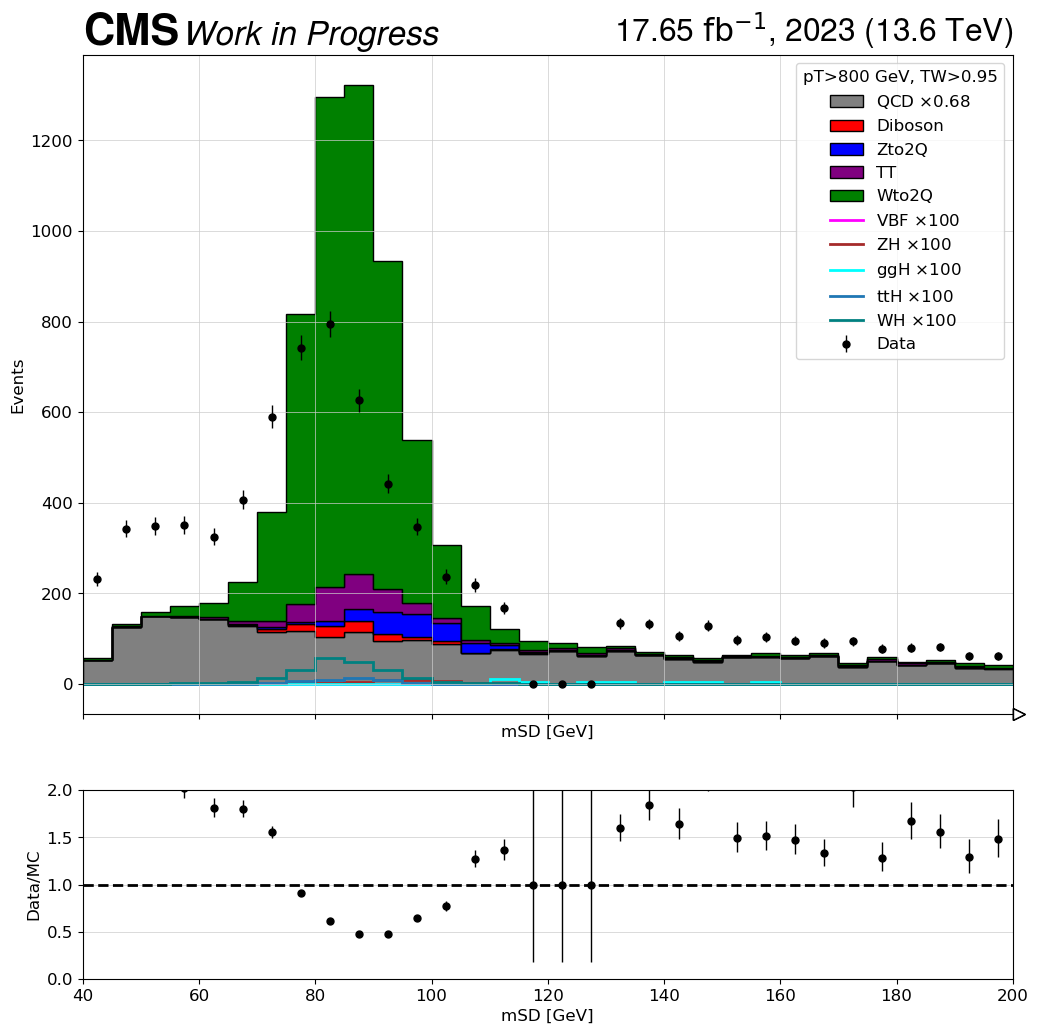

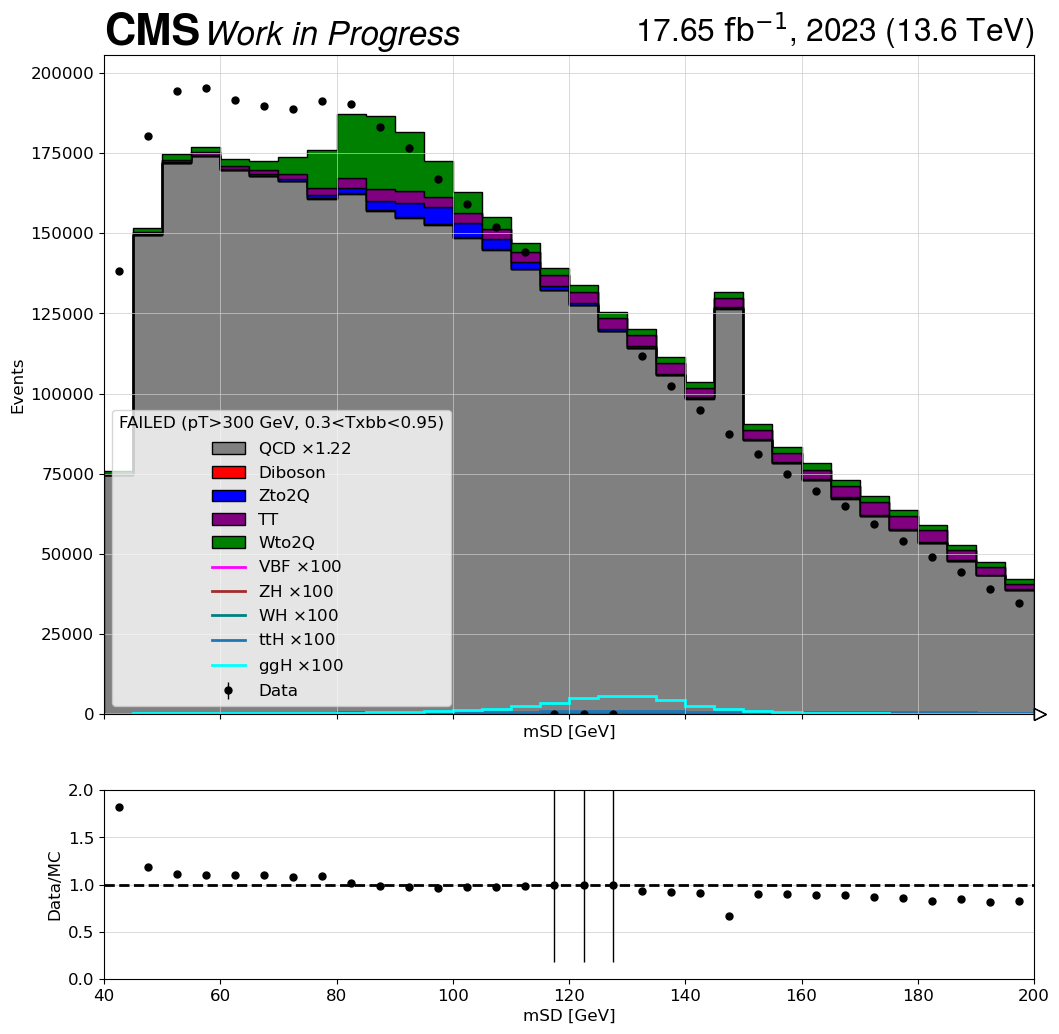

In [26]:
plot_stack("h", "msd", "pT>800 GeV, TW>0.95")
plot_stack("f", "msd", "FAILED (pT>300 GeV, 0.3<Txbb<0.95)")

In [9]:
# HIGGS

from hist.intervals import ratio_uncertainty

def plot_stack(type, mass, cut):

    scale = kfactor[type][mass]["QCD"]
    processes = ["Zto2Q", "Wto2Q", "Diboson", "TT"]
    higgs = ["VBF", "ggH", "WH", "ZH", "ttH"]

    h_scaled = [hists[type][mass][sample] * kfactor[type][mass][sample] for sample in processes]
    legends = [sample for sample in processes]
    colors = ['blue', 'green', 'red', 'purple', 'orange' ] # , 'pink', 'mediumslateblue'
    higgs_colors = ['magenta', 'cyan', 'teal' , 'brown']
    higgs_histos = [hists[type][mass][sample]*100 for sample in higgs]
    higgs_legends = [r"VBF $\times$"+ f"{100}", r"ggH $\times$"+ f"{100}", r"WH $\times$"+ f"{100}", r"ZH $\times$"+ f"{100}", r"ttH $\times$"+ f"{100}"]



    h_data = hists[type][mass]["data"]


    # Calculate yields for each histogram (dynamically from the h_scaled list)
    yields = {legend: hist.values().sum() for legend, hist in zip(legends, h_scaled)}

    # Sort histograms by yield, keeping track of indices
    sorted_indices = sorted(range(len(h_scaled)), key=lambda i: yields[legends[i]], reverse=False)

    # Sort histograms, legends, and colors
    sorted_histograms = [h_scaled[i] for i in sorted_indices]
    sorted_legends = [legends[i] for i in sorted_indices]
    sorted_colors = [colors[i] for i in sorted_indices]

    # Add QCD histogram with scaling to the plot setup
    h_qcd = hists[type][mass]["QCD"] * scale
    h = [h_qcd] + sorted_histograms
    colors = ['gray'] + sorted_colors
    legends = [r"QCD $\times$"+ f"{scale:.2f}"] + sorted_legends

    # Set up the figure
    fig, (ax, rax) = plt.subplots(
        2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18}, sharex=True
    )

    # Step 1: Identify the bin indices for 115 to 135 GeV range
    edges = h_data.axes[0].edges  # Assuming the first axis corresponds to mass/energy
    mask = (edges[:-1] >= 115) & (edges[:-1] < 130)  # Mask for bins in the specified range

    # Step 2: Set the values to zero for these bins in both data and total background
    data_val = h_data.values()
    data_val[mask] = 0  # Set bins to zero in the data histogram


    # Update the data histogram for plotting with masked values set to zero
    h_data.values()[:] = data_val  # Update h_data with modified values

    # First panel: Plot histograms with stacking
    ax.set_ylabel("Events")
    hep.histplot(h, ax=ax, stack=True, label=legends, color=colors, density=False, histtype="fill", edgecolor="black", linewidth=1)

    hep.histplot(higgs_histos, ax=ax, stack=False, sort="yield", label=higgs_legends, color=higgs_colors, density=False, histtype="step", linewidth=2)

    # Plot data as error bars
    hep.histplot(h_data, ax=ax, histtype="errorbar", color="black", label="Data")
    ax.legend(title=f"{cut}")
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")
    ax.set_xlim(40, 200)
    if mass == "msd":
        ax.set_xlabel("mSD [GeV]")
    elif mass == "mreg":
        ax.set_xlabel("m_reg [GeV]")
    elif mass == "mleg":
        ax.set_xlabel("m_legacy [GeV]")


    # Add legend
    hep.cms.label(
                    "Work in Progress",
                    fontsize=24,
                    data=True,
                    lumi="17.65",
                    year="2023",
                    ax=ax,
                    com="13.6",
                )

    # 2nd panel
    bg_total = sum(h_scaled, h_qcd) ## , h_qcd, h_diboson, h_tt
    tot_val = bg_total.values()
    tot_val[mask] = 0  # Set bins to zero in the background total
    tot_val_zero_mask = tot_val == 0
    bg_total.values()[:] = tot_val  # Update bg_total with modified values
    tot_val[tot_val_zero_mask] = 1
    data_val = h_data.values()
    data_val[tot_val_zero_mask] = 1
    yerr = ratio_uncertainty(data_val, tot_val, "poisson")
    yvalue = data_val / tot_val

    hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="errorbar", color="black")
    rax.set_ylabel("Data/MC")
    rax.set_ylim(0, 2)
    if mass == "msd":
        rax.set_xlabel("mSD [GeV]")
    if mass == "mreg":
        rax.set_xlabel("m_res [GeV]")
    if mass == "mleg":
        rax.set_xlabel("m_legacy [GeV]")
    rax.set_xlim(40, 200)
    rax.grid(axis="y")
    rax.axhline(1, color="black", linestyle="--")
    plt.show()
 